# Titanic - Machine Learning from Disaster

Question: What sorts of people were more likely to survive? (using passenger data: name, age gender, socio-economic class, etc.)

Goal: Predict if a passenger survived the sinking of the Titanic or not. For each in thte test set, you must predict a 0 or a 1 value for the variable.

Metric: Your score is the percentage of passengers you correctly predict. This is known as accuracy.

## Steps
1. View and Clean Data
2. Set up Logistical Regression
3. Set up Feed Forward NN
4. Train/Test Model
5. Increase accuracy


In [1]:
import data_pipeline
from data_pipeline import (
    read_titanic_data,
    clean_titanic_data,
    prepare_titanic_data,
)
from train_pipeline import Model

In [2]:
# Extract, prepare, and split data

path = 'titanic/'
train_df = read_titanic_data(path,'train.csv')
test_df = read_titanic_data(path,'test.csv')

train_clean_df, encoded_labels = clean_titanic_data(train_df)
new_train_df, train_test_split = prepare_titanic_data(train_clean_df, 0.2, 42)

X_train, X_test, y_train, y_test = train_test_split


In [143]:
new_train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,-0.522376,1,0,-0.521028,2
1,1,1,0,0.579179,1,0,0.685138,0
2,1,3,0,-0.246988,0,0,-0.508313,2
3,1,1,0,0.372637,1,0,0.342628,2
4,0,3,1,0.372637,0,0,-0.505958,2
...,...,...,...,...,...,...,...,...
885,0,3,0,0.648026,0,5,-0.108978,1
886,0,2,1,-0.178140,0,0,-0.412718,2
887,1,1,0,-0.728918,0,0,-0.092496,2
889,1,1,1,-0.246988,0,0,-0.092496,0


# Logistic Regression

Model: LogisticRegression()

Model Accuracy: 83.688%

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.91      0.87        85
           1       0.84      0.73      0.78        56

    accuracy                           0.84       141
   macro avg       0.84      0.82      0.83       141
weighted avg       0.84      0.84      0.83       141



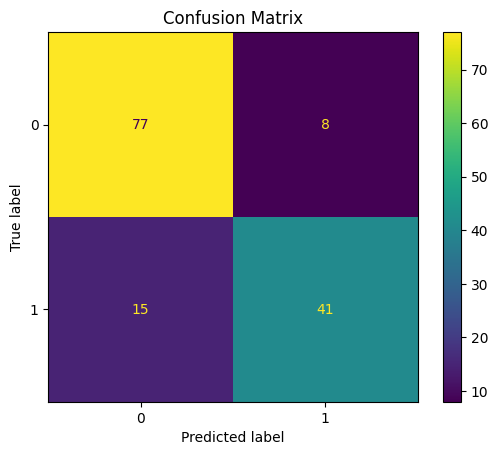

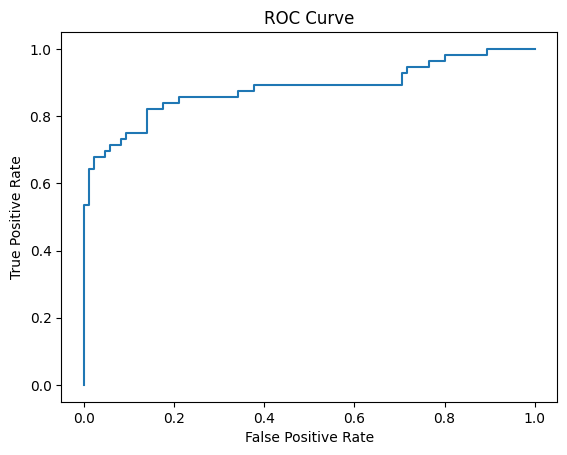

In [3]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression

log_reg = Model(LogisticRegression())
model, y_pred = log_reg.train(X_train, y_train, X_test)
accuracy, conf_matrix, class_report, fpr, tpr, = log_reg.evaluate_model(X_test, y_test, y_pred)

log_reg.display_metrics(accuracy, conf_matrix, class_report, fpr, tpr)



In [4]:
log_reg.save_model('trained_models/logistic_regression.pkl')

Saved model 'LogisticRegression' as trained_models/logistic_regression.pkl


# Decision Tree

Model: DecisionTreeClassifier()

Model Accuracy: 78.723%

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.88      0.83        85
           1       0.78      0.64      0.71        56

    accuracy                           0.79       141
   macro avg       0.79      0.76      0.77       141
weighted avg       0.79      0.79      0.78       141



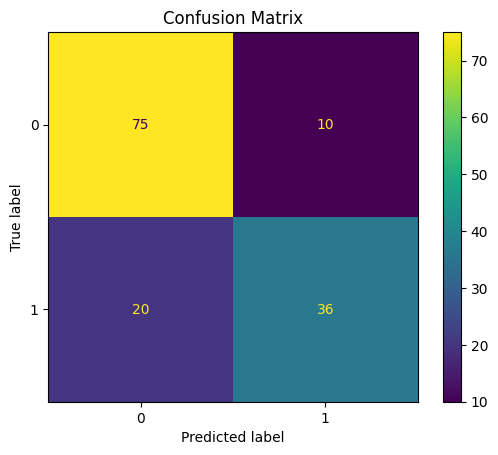

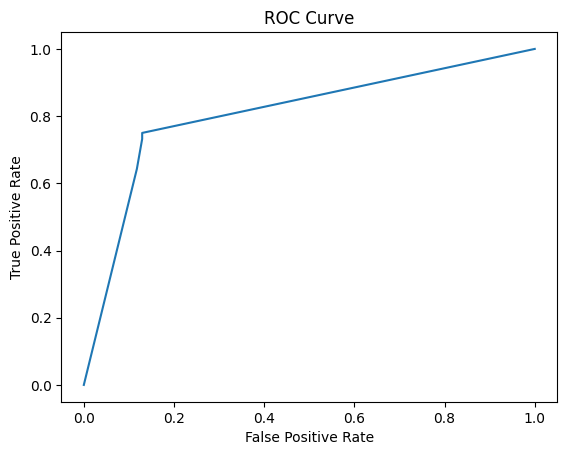

In [5]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier

decision_tree = Model(DecisionTreeClassifier())
model, y_pred = decision_tree.train(X_train, y_train, X_test)
accuracy, conf_matrix, class_report, fpr, tpr, = decision_tree.evaluate_model(X_test, y_test, y_pred)

decision_tree.display_metrics(accuracy, conf_matrix, class_report, fpr, tpr)


In [6]:
decision_tree.save_model('trained_models/decision_tree.pkl')

Saved model 'DecisionTreeClassifier' as trained_models/decision_tree.pkl


# Random Forest

Model: RandomForestClassifier()

Model Accuracy: 85.106%

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.95      0.89        85
           1       0.91      0.70      0.79        56

    accuracy                           0.85       141
   macro avg       0.87      0.82      0.84       141
weighted avg       0.86      0.85      0.85       141



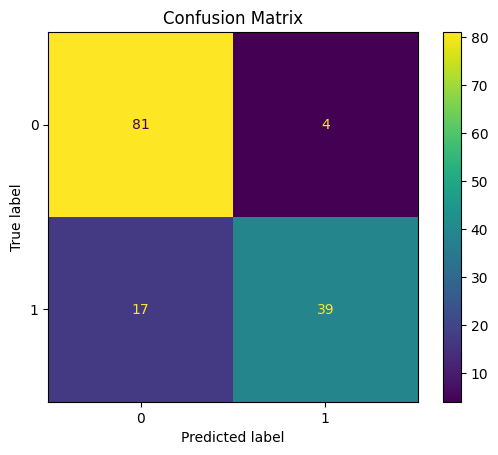

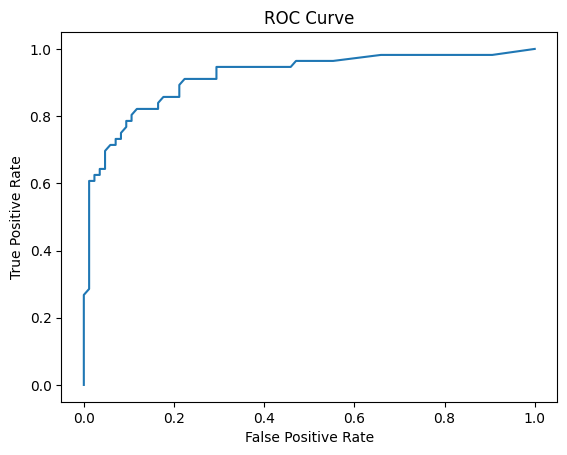

In [7]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier

random_forest = Model(RandomForestClassifier())

model, y_pred = random_forest.train(X_train, y_train, X_test)
accuracy, conf_matrix, class_report, fpr, tpr, = random_forest.evaluate_model(X_test, y_test, y_pred)

random_forest.display_metrics(accuracy, conf_matrix, class_report, fpr, tpr)

In [8]:
random_forest.save_model('trained_models/random_forest.pkl')

Saved model 'RandomForestClassifier' as trained_models/random_forest.pkl


# Support Vector Machine

Model: SVC(probability=True)

Model Accuracy: 87.943%

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.92      0.90        85
           1       0.87      0.82      0.84        56

    accuracy                           0.88       141
   macro avg       0.88      0.87      0.87       141
weighted avg       0.88      0.88      0.88       141



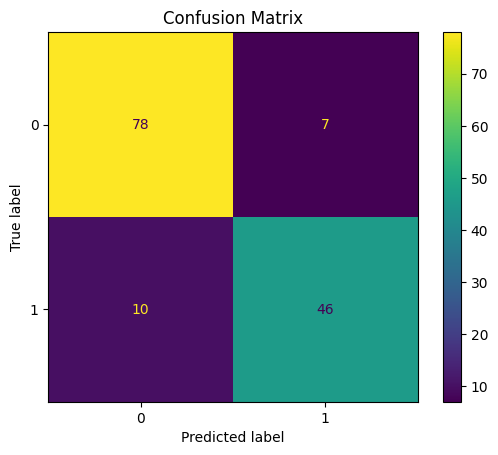

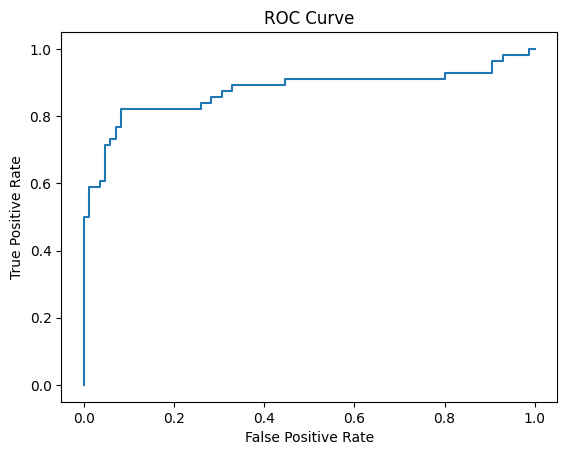

In [9]:
# Support Vector Machine

from sklearn.svm import SVC

svm = Model(SVC(probability=True))

model, y_pred = svm.train(X_train, y_train, X_test)
accuracy, conf_matrix, class_report, fpr, tpr, = svm.evaluate_model(X_test, y_test, y_pred)

svm.display_metrics(accuracy, conf_matrix, class_report, fpr, tpr)

In [10]:
svm.save_model('trained_models/support_vector_machine.pkl')

Saved model 'SVC(probability=True)' as trained_models/support_vector_machine.pkl


# Gradient Boosting

Model: GradientBoostingClassifier()

Model Accuracy: 85.816%

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.96      0.89        85
           1       0.93      0.70      0.80        56

    accuracy                           0.86       141
   macro avg       0.88      0.83      0.84       141
weighted avg       0.87      0.86      0.85       141



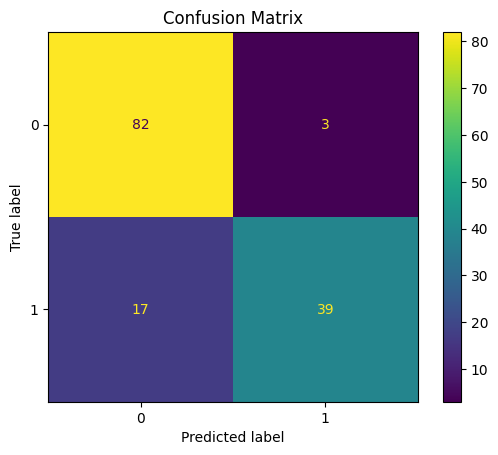

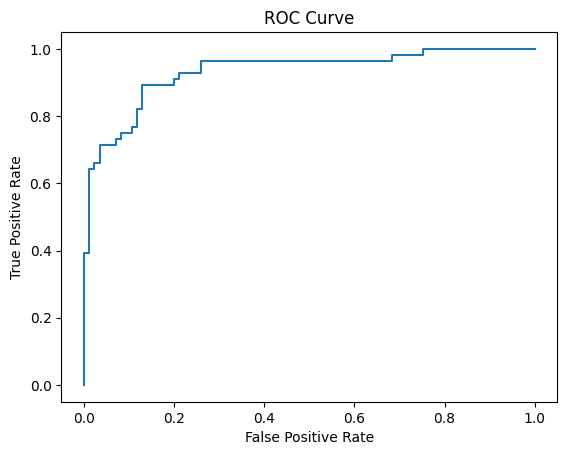

In [11]:
# Gradient Boosting

from sklearn.ensemble import GradientBoostingClassifier

gradient_boosting = Model(GradientBoostingClassifier())

model, y_pred = gradient_boosting.train(X_train, y_train, X_test)
accuracy, conf_matrix, class_report, fpr, tpr, = gradient_boosting.evaluate_model(X_test, y_test, y_pred)

gradient_boosting.display_metrics(accuracy, conf_matrix, class_report, fpr, tpr)

In [12]:
gradient_boosting.save_model('trained_models/gradient_boosting.pkl')

Saved model 'GradientBoostingClassifier' as trained_models/gradient_boosting.pkl


# Pytorch Model

In [3]:
from train_neural_net import(
    NeuralNetwork,
    CustomDataset,
    convert_df_to_tensor,
)
from torch.utils.data import DataLoader

X_train_tensor = convert_df_to_tensor(X_train)
y_train_tensor = convert_df_to_tensor(y_train)

y_train_tensor = y_train_tensor.reshape(len(y_train_tensor),1)

train_dataset = CustomDataset(X_train_tensor, y_train_tensor)
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)

X_test_tensor = convert_df_to_tensor(X_test)
y_test_tensor = convert_df_to_tensor(y_test)

y_test_tensor = y_test_tensor.reshape(len(y_test_tensor),1)

test_dataset = CustomDataset(X_test_tensor, y_test_tensor)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=True)

In [4]:
from train_neural_net import train_pytorch_model, save_model

pytorch_model, best_epoch, best_avg_loss, train_list, val_list, epoch = train_pytorch_model(train_dataloader, test_dataloader, num_epochs=100)

print(f"Best Model loss: {best_avg_loss}")

Epoch 1
Train Loss: 0.653710212972429
Val Loss: 0.6026807427406311

Epoch 2
Train Loss: 0.5612870934936736
Val Loss: 0.4859492778778076

Epoch 3
Train Loss: 0.5127305189768473
Val Loss: 0.4532671570777893

Epoch 4
Train Loss: 0.48919383188088733
Val Loss: 0.4604476988315582

Epoch 5
Train Loss: 0.48523520098792183
Val Loss: 0.44700437784194946

Epoch 6
Train Loss: 0.4561480267180337
Val Loss: 0.41149401664733887

Epoch 7
Train Loss: 0.4341037654214435
Val Loss: 0.3887987732887268

Epoch 8
Train Loss: 0.426120282875167
Val Loss: 0.3892791271209717

Epoch 9
Train Loss: 0.41768338282903034
Val Loss: 0.4059956669807434

Epoch 10
Train Loss: 0.41210003528330064
Val Loss: 0.3425164222717285

Epoch 11
Train Loss: 0.40883808996942306
Val Loss: 0.390333354473114

Epoch 12
Train Loss: 0.4010654596818818
Val Loss: 0.3338204622268677

Epoch 13
Train Loss: 0.38526308205392623
Val Loss: 0.40288639068603516

Epoch 14
Train Loss: 0.41369903253184426
Val Loss: 0.3801381289958954

Epoch 15
Train Loss: 0

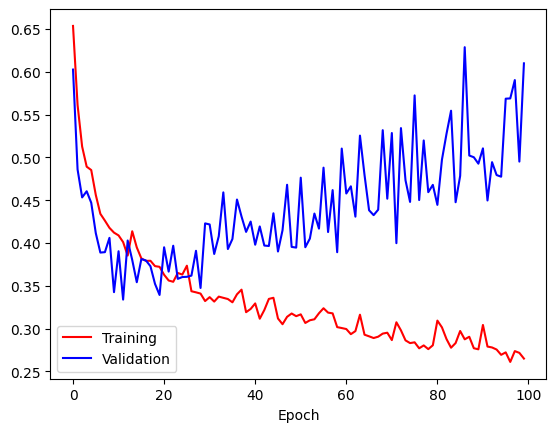

In [6]:
import matplotlib.pyplot as plt


plt.plot(epoch, train_list, label='Training', color='red')
plt.plot(epoch, val_list, label='Validation', color='blue')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [5]:
from datetime import datetime

timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
save_model(pytorch_model, best_epoch, timestamp)